In [12]:
# 기술통계에 대해서 알아보자!
# 사용할 데이터 셋을 로딩하자!

import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)
# display(df.head())

# 영어성적을 가지고 있는 Series를 생성한다.
scores = df['english'][:10]   # 상위 10개의 데이터만 이용

# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성한다.
scores_df = pd.DataFrame(scores)
# display(scores_df)

# 영어 성적의 평균을 구해보자!
print(scores.mean())      # 55.0  Series의 메소드를 이용해서 구한 값!
print(np.mean(scores))    # 55.0  Numpy mean() 함수를 이용해서 구한 값!
print(scores_df.mean())   # 55.0  DataFrame의 메소드를 이용해서 구할 수 있다.
                          # 단, 결과가 Series로 출력 된다.

# 영어 성적의 중위값을 구해보자!
print(np.median(scores))   # 56.5

# 최빈값을 구해보자!  pandas의 mode()
print(pd.Series([1, 1, 1, 2, 2, 3]).mode())   # 1

55.0
55.0
english    55.0
dtype: float64
56.5
0    1
dtype: int64


In [26]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)
# display(df.head())

# 영어성적을 가지고 있는 Series를 생성한다.
scores = df['english'][:10]   # 상위 10개의 데이터만 이용

# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성한다.
scores_df = pd.DataFrame(scores)
# display(scores_df)

# 영어 성적에 대한 편차(deviation)을 구해보자!
deviation = scores - np.mean(scores)
print(deviation.mean())   # 0.0 편차의 평균은 당연히 0이다!
# variance(분산)을 구해보자!
# 편차의 제곱의 평균을 구해보자!
print(np.mean(deviation ** 2))   # 86.0
print(np.var(scores))    # 86.0  Numpy로 구한 것!
print(scores_df.var())   # DataFrame 모든 column에 대해서 variance를 구한다.
                         # 95.555556
# Numpy로 구한 분산과 Pandas로 구한 분산이 다르다.
# 분산은 크게 두가지가 있다.
# 표본분산과 불편분산
# 표본분산은 우리가 알고 있는 분산이다!
# 불편분산은 n으로 나누어 평균을 구하는 게 아니라 n-1로 나눈다.
# 통계학에서 기본으로 사용하는 분산은 불편분산이다.
# Pandas는 기본적으로 불편분산을 사용하고 Numpy는 표본분산을 이용한다.
# Pandas로 표본분산을 구하려면 어떻게 해야 할까?
print(scores_df.var(ddof=0))   # ddof=0 옵션을 줘서 계산하면 표본분산으로 계산

# np.sqrt => 제곱근을 구한다.
print(np.sqrt(np.var(scores)))   # 9.273618495495704 => standard deviation(표준편차)
print(np.std(scores))   # 9.273618495495704

0.0
86.0
86.0
english    95.555556
dtype: float64
english    86.0
dtype: float64
9.273618495495704
9.273618495495704


In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)
# display(df.head())

# 영어성적을 가지고 있는 Series를 생성한다.
scores = df['english'][:10]   # 상위 10개의 데이터만 이용

# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성한다.
scores_df = pd.DataFrame(scores)
# display(scores_df)

# 사분의 값을 구하는 Numpy 함수가 있다.
Q1 = np.percentile(scores, 25)   # 1사분위
Q2 = np.percentile(scores, 50)   # 2사분위 = 중위값 = median
Q3 = np.percentile(scores, 75)   # 3사분위

IQR = Q3 - Q1
print(IQR)   # 15.0

15.0


In [35]:
# 1변수(1차원) 데이터로 도수분포표를 DataFrame으로 만들어보자! 
import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)
# display(df.head())

# 영어성적을 가지고 있는 narray를 생성한다.
scores = df['english'].values
print(scores)

# 특정 구간에 몇개의 데이터가 포함되는지를 알려주는 Numpy 함수가 있다.
freq, tmp = np.histogram(scores, bins=10, range=(0,100))
print(tmp)   # 경계값
print(freq)  # 각 bin(class) 안의 도수(frequency)

# DataFrame으로 도수분포표를 표현해보자!
# 먼저 행 index부터 만들어보자! (list comprehension)
freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'Frequency':freq},
                            index=freq_class)
display(freq_dist_df)

[42 69 56 41 57 48 65 49 65 58 70 47 51 64 62 70 71 68 73 37 65 65 61 52
 57 57 75 61 47 54 66 54 54 42 37 79 56 62 62 55 63 57 57 67 55 45 66 55
 64 66]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[ 0  0  0  2  8 16 18  6  0  0]


,Frequency
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


In [42]:
# 1변수(1차원) 데이터로 도수분포표를 DataFrame으로 만들어보자! 
# 추가적으로 class mark, relative frequency(상대 도수),
# cumulative relative frequency(누적 상대 도수)
import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)
# display(df.head())

# 영어성적을 가지고 있는 narray를 생성한다.
scores = df['english'].values
# print(scores)

# 특정 구간에 몇개의 데이터가 포함되는지를 알려주는 Numpy 함수가 있다.
freq, tmp = np.histogram(scores, bins=10, range=(0,100))
# print(tmp)   # 경계값
# print(freq)  # 각 bin(class) 안의 도수(frequency)

# DataFrame으로 도수분포표를 표현해보자!
# 먼저 행 index부터 만들어보자! (list comprehension)
freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'Frequency':freq},
                            index=freq_class)
# display(freq_dist_df)

# class mark
class_mark = [(i + (i + 10)) / 2 for i in range(0,100,10)]
freq_dist_df['class_mark'] = class_mark

# display(freq_dist_df)

# 상대 도수(relative frequency)
rel_freq = freq / freq.sum()
freq_dist_df['rel_freq'] = rel_freq

# display(freq_dist_df)

# 누적 상대 도수(cumulative relative frequency)
# print(rel_freq)
# print(np.cumsum(rel_freq))  # Numpy가 가지고 있는 누적합을 구하는 함수 이용
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq)
display(freq_dist_df)

,Frequency,class_mark,rel_freq,cum_rel_freq
0~10,0,5.0,0.00,0.00
10~20,0,15.0,0.00,0.00
20~30,0,25.0,0.00,0.00
30~40,2,35.0,0.04,0.04
40~50,8,45.0,0.16,0.20
50~60,16,55.0,0.32,0.52
60~70,18,65.0,0.36,0.88
70~80,6,75.0,0.12,1.00
80~90,0,85.0,0.00,1.00
90~100,0,95.0,0.00,1.00


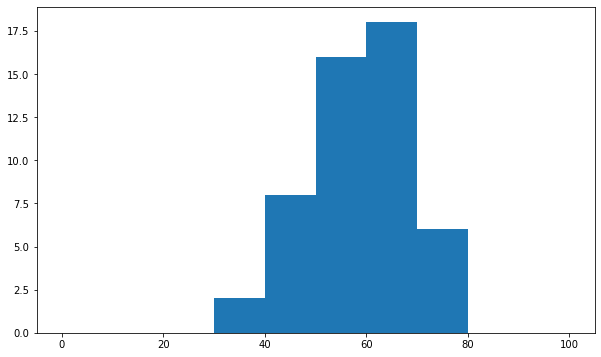

In [43]:
# 1차원 데이터를 이용해서 Histogram을 그려보자!
# matplotlib을 이용해서 그려보자!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)   # (50, 2)

# 영어성적을 가지고 있는 narray를 생성한다.
scores = df['english'].values

# 그래프를 그려보자!
figure = plt.figure(figsize=(10,6))   # 도화지 사이즈 10 x 6

ax = figure.add_subplot(1,1,1)   # 1행 1열 1번째

# matplotlib을 이용해서 histogram을 그린다!
ax.hist(scores, bins=10, range=(0,100))
plt.show()

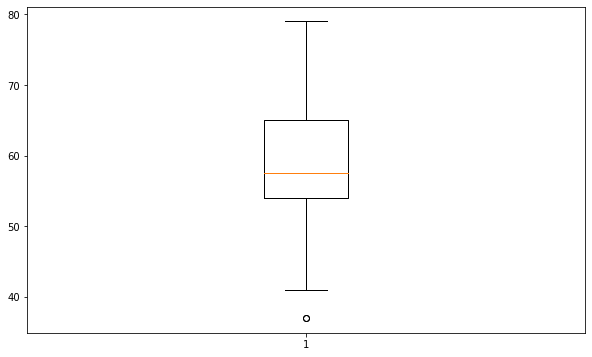

In [44]:
# 1차원 데이터를 이용해서 boxplot을 그려보자!
# matplotlib을 이용해서 그려보자!
# 데이터의 분포와 이상치 여부를 알 수 있다!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# print(df.shape)   # (50, 2)

# 영어성적을 가지고 있는 narray를 생성한다.
scores = df['english'].values

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.boxplot(scores)

plt.show()

In [48]:
# 2차원 데이터를 이용해서 수치지표와 그래프를 표현해보자!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')

# display(df)
en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]

# print(en_scores)
scores_df = pd.DataFrame({'english': en_scores.values,
                          'mathematics': ma_scores.values},
                         index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

display(scores_df)


,english,mathematics
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78
J,58,82


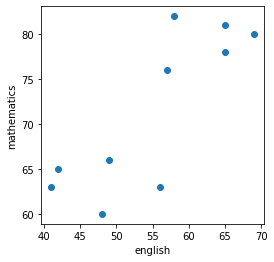

55.0 71.4


In [51]:
# 2차원 데이터를 이용해서 수치지표와 그래프를 표현해보자!
# scatter를 그려보자!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')

# display(df)
en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]

# print(en_scores)
scores_df = pd.DataFrame({'english': en_scores.values,
                          'mathematics': ma_scores.values},
                         index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

# display(scores_df)
figure = plt.figure(figsize=(4,4))
ax = figure.add_subplot(1,1,1)

ax.scatter(en_scores, ma_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

# 영어와 수학의 평균을 구해보자!
print(en_scores.mean(), ma_scores.mean())   # 55.0 71.4